<a href="https://colab.research.google.com/github/messias077/REP/blob/main/Problema_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Intercept.....: 58.54308577839414
Erro inicial..: 36.19501862145697 



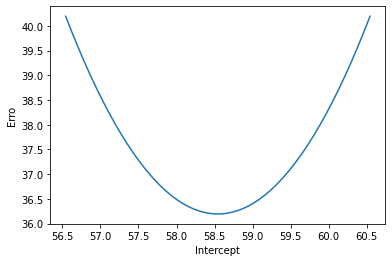

In [206]:
""" Resolvendo um problema de regressão """

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregando os dados
# Obtida em: https://www.kaggle.com/kumarajarshi/life-expectancy-who
# Obs.: Possui valores 'NaN' tem que preencher com zeros
df = pd.read_csv('/content/sample_data/Life Expectancy Data.csv')

# Separando em features e target
X = df.iloc[:, 4:].values # Retira as colunas 'Country', 'Year' 'Status' e 'Life expectancy'
y = df.iloc[:, 3].values # Pega somente a coluna 'Life expectancy'


def calcular_erros_vs_intercepts(intercept, coef):
    """
    Calcula cada variação do intercept e guarda num vetor, depois faz uma predição
    para cada valor e calcula o respectivo 'mean_squared_error'
    """
    # Instancia o modelo e seta os coeficientes
    modelo = LinearRegression()
    modelo.coef_ = coef

    # Prepara para variar o intercept
    delta = 2
    qtd_amostras = 50
    intercepts = np.linspace(intercept - delta, intercept + delta, qtd_amostras)

    # Gera o vetor para guardar os erros calculados
    erros = np.empty(intercepts.shape)

    # Faz as predições e calcula os MSEs
    for i in range(len(intercepts)):
        modelo.intercept_ = intercepts[i]
        ypred = modelo.predict(X)
        erros[i] = mean_squared_error(y, ypred)

    return intercepts, erros
    

# Treinando e predizendo para obter o valor do Intercept
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)

print('\nIntercept.....:', modelo.intercept_)
print('Erro inicial..:', mean_squared_error(y, ypred), '\n')

intercepts, erros = calcular_erros_vs_intercepts(modelo.intercept_, modelo.coef_)

plt.ylabel("Erro")
plt.xlabel("Intercept")
plt.plot(intercepts, erros)
plt.show()
